# Optimization under Uncertainty on the Himmelbau Function

In [1]:
import sys
sys.path.insert(1, '../')

import numpy as np
from bayesopt import BayesianOptimization

from riskkernel import Normal_SEKernel
from surrogate import GaussianProcessRiskNeutral
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF

from strategy import EIStrategy, SRBFStrategy, RandomStrategy
from experimental_design import SymmetricLatinHypercube as SLHC
import matplotlib.pyplot as plt

In [10]:
"""Himmelbau Function 2-Dimensional
Four equivalent minima with function value zero at (3,2), (-2.8,3.13), (-3.779,3.28), (3.58,-1.84)
"""
f = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0]+x[1]**2 - 7)**2

# just for plotting...easier to evaluate with meshgrid
g = lambda x,y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# dimension
dim        = 2

# make sure minima are in the feasible region
lb         = -5.0*np.ones(dim)
ub         = 5.0*np.ones(dim)

# maximum evaluations
max_evals  = 400

In [7]:
# experimental design
initial_num_pts    = 20*dim  # initial evaluations
exp_design = SLHC(dim, initial_num_pts)

# strategy
strategy   = SRBFStrategy(lb,ub)

# uncertainty variance
var    = 0.01
K      = var*np.eye(dim)

# risk-neutral GP kernel
kernel     = Normal_SEKernel(K)

# initialize surrogate
surrogate  = GaussianProcessRiskNeutral(kernel)

# initialize the problem
problem    = BayesianOptimization(f,dim, max_evals, exp_design, strategy, surrogate,lb, ub)

In [8]:
# solve the problem
xopt,fopt  = problem.minimize()

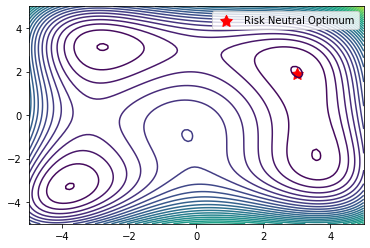

In [9]:
# plot the function
Ntest = 100
x = np.linspace(lb[0],ub[0],Ntest)
y = np.linspace(lb[1],ub[1],Ntest)
X,Y = np.meshgrid(x,y)
Z   = g(X,Y)
plt.contour(X,Y,Z,range(1,1000,30))

# plot the optimum
plt.scatter(xopt[0],xopt[1],color='r',s=150, marker=(5,1),label='Risk Neutral Optimum')
plt.legend()
plt.show()